The accuracy of the Naive Bayes classifier is: 78.04%
The accuracy of the SVM classifier is: 73.32%
The accuracy of the Logistic Regression classifier is: 75.80%
The accuracy of the Cosine Similarity model is: 70.67%


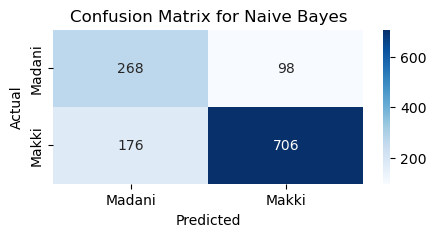

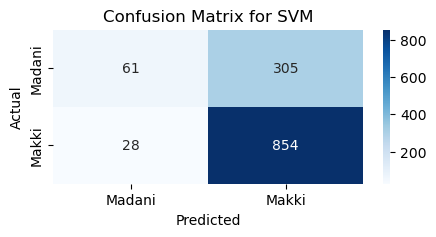

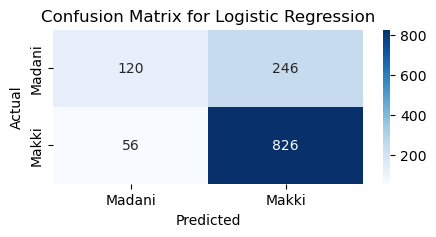

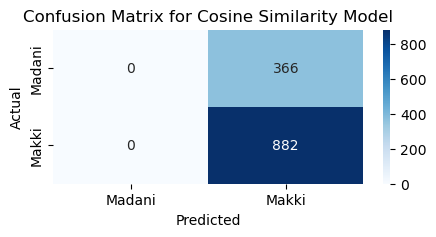


Analysis of Misclassified Cases by Naive Bayes:

Case 1:
Verse: ولا تجادل عن الذين يختانون أنفسهم ۚ إن الله لا يحب من كان خوانا أثيما
True Label: Madani
Predicted Label: Makki
Reason for Misclassification: Possible reasons include insufficient word features, similar context across categories, or overlap in linguistic styles between Makki and Madani verses.

Case 2:
Verse: لولا إذ سمعتموه ظن المؤمنون والمؤمنات بأنفسهم خيرا وقالوا هٰذا إفك مبين
True Label: Madani
Predicted Label: Makki
Reason for Misclassification: Possible reasons include insufficient word features, similar context across categories, or overlap in linguistic styles between Makki and Madani verses.

Case 3:
Verse: وقال موسىٰ يا فرعون إني رسول من رب العالمين
True Label: Makki
Predicted Label: Madani
Reason for Misclassification: Possible reasons include insufficient word features, similar context across categories, or overlap in linguistic styles between Makki and Madani verses.

Case 4:
Verse: من كان يريد ثواب الدنيا فع

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the Excel file
file_path = r"C:\Users\TUF\Desktop\nlpnlp\Fully_Adjusted_Final_Corpus_Result.xlsx"
data = pd.read_excel(file_path)

# Define a function to count words in a verse
def count_words(text):
    return len(text.split())

# Apply the word count function
data['Word Count'] = data['Verse'].apply(count_words)

# Label encoding for Surah names as a feature
le = LabelEncoder()
data['Sura Name Encoded'] = le.fit_transform(data['Sura Name'])

# Actual types from dataset
data['Actual Type'] = data['Type'].apply(lambda x: 'Madani' if x == 'md' else 'Makki')

# Split the data into features and target
X = data[['Word Count', 'Sura Name Encoded']]
y = data['Actual Type']
verses = data['Verse']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, verses_train, verses_test = train_test_split(X, y, verses, test_size=0.20, random_state=42)

# Initialize and train the classifiers
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict the classifications for the testing set with each model
y_pred_nb = nb_classifier.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)
y_pred_lr = log_reg.predict(X_test)

# Calculate and print the accuracy of each model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"The accuracy of the Naive Bayes classifier is: {accuracy_nb * 100:.2f}%")
print(f"The accuracy of the SVM classifier is: {accuracy_svm * 100:.2f}%")
print(f"The accuracy of the Logistic Regression classifier is: {accuracy_lr * 100:.2f}%")

# Vectorize the text data for similarity analysis
vectorizer = TfidfVectorizer()
verses_train_tfidf = vectorizer.fit_transform(verses_train)
verses_test_tfidf = vectorizer.transform(verses_test)

# Calculate cosine similarity matrix for the test set
cos_sim_matrix = cosine_similarity(verses_test_tfidf)

# Define a threshold for cosine similarity
cos_sim_threshold = 0.5  # Adjust this threshold based on your requirement

# Predict classes based on cosine similarity
def predict_cos_sim(cos_sim_matrix, threshold):
    predicted_classes = []
    for row in cos_sim_matrix:
        avg_sim = np.mean(row)
        predicted_classes.append('Madani' if avg_sim > threshold else 'Makki')
    return np.array(predicted_classes)

# Predict classes and calculate accuracy
y_pred_cos_sim = predict_cos_sim(cos_sim_matrix, cos_sim_threshold)
accuracy_cos_sim = accuracy_score(y_test, y_pred_cos_sim)

print(f"The accuracy of the Cosine Similarity model is: {accuracy_cos_sim * 100:.2f}%")

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(5, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Madani', 'Makki'], yticklabels=['Madani', 'Makki'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred_nb, "Confusion Matrix for Naive Bayes")
plot_confusion_matrix(y_test, y_pred_svm, "Confusion Matrix for SVM")
plot_confusion_matrix(y_test, y_pred_lr, "Confusion Matrix for Logistic Regression")
plot_confusion_matrix(y_test, y_pred_cos_sim, "Confusion Matrix for Cosine Similarity Model")

# Function to analyze misclassified cases for each model
def analyze_misclassifications(model_name, y_true, y_pred, verses):
    misclassified_indices = np.where(y_pred != y_true)[0]
    misclassified_samples = verses.iloc[misclassified_indices]
    misclassified_predictions = y_pred[misclassified_indices]
    
    print(f"\nAnalysis of Misclassified Cases by {model_name}:")
    for i in range(min(5, len(misclassified_samples))):
        print(f"\nCase {i+1}:")
        print(f"Verse: {misclassified_samples.iloc[i]}")
        print(f"True Label: {y_true.iloc[misclassified_indices[i]]}")
        print(f"Predicted Label: {misclassified_predictions[i]}")
        print("Reason for Misclassification: Possible reasons include insufficient word features, similar context across categories, or overlap in linguistic styles between Makki and Madani verses.")

# Analyze misclassifications for each model
analyze_misclassifications("Naive Bayes", y_test, y_pred_nb, verses_test)
analyze_misclassifications("SVM", y_test, y_pred_svm, verses_test)
analyze_misclassifications("Logistic Regression", y_test, y_pred_lr, verses_test)
analyze_misclassifications("Cosine Similarity Model", y_test, y_pred_cos_sim, verses_test)
